In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df_solarenergy = pd.read_csv('spg.csv')

In [ ]:
# Separate features and target
X = df_solarenergy.drop(columns=['generated_power_kw'])
y = df_solarenergy['generated_power_kw']

In [ ]:
#Data Transformation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)

print("🌟 Random Forest Model Evaluation:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Square Error:", rmse)

🌟 Random Forest Model Evaluation:
Mean Squared Error: 166589.05175329788
R² Score: 0.8176292724550602
Mean Absolute Error: 255.72073411346415
Root Mean Square Error: 408.15322092726143


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Calculate metrics in original units
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # in %

# Display results
print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ R-squared (R²): {r2:.4f}")
print(f"✅ Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

✅ Mean Squared Error (MSE): 166589.0518
✅ Mean Absolute Error (MAE): 255.7207
✅ Root Mean Squared Error (RMSE): 408.1532
✅ R-squared (R²): 0.8176
✅ Mean Absolute Percentage Error (MAPE): 15003.66%


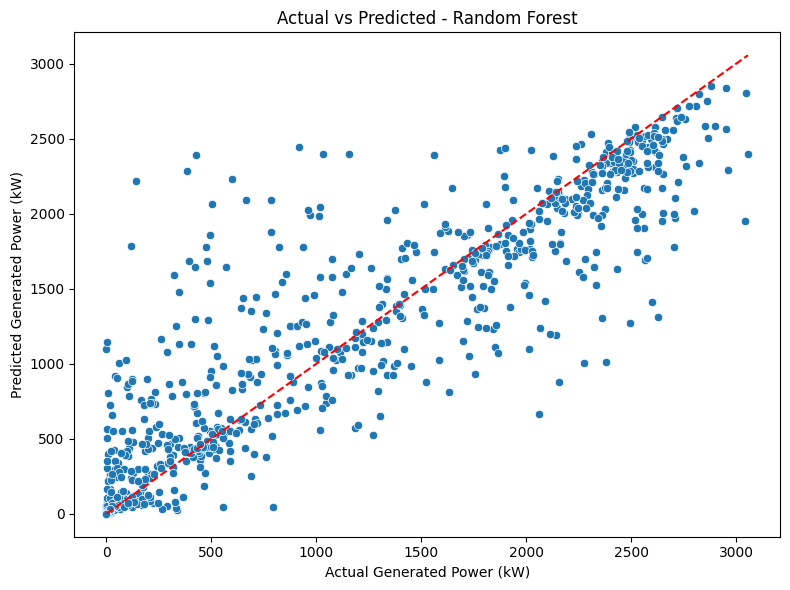

In [ ]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Generated Power (kW)")
plt.ylabel("Predicted Generated Power (kW)")
plt.title("Actual vs Predicted - Random Forest")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

/tmp/ipython-input-531633876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature', palette='viridis')


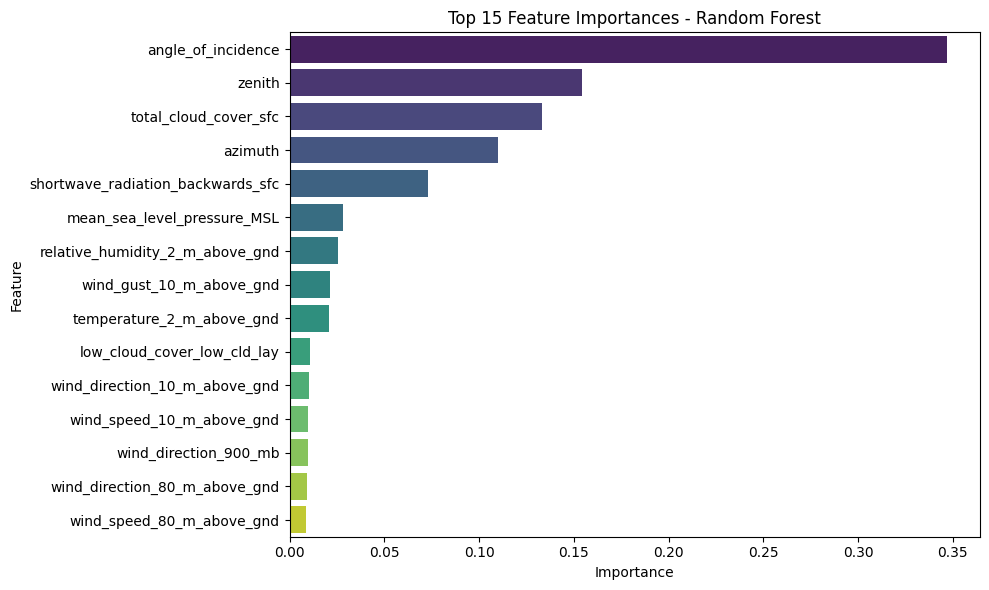

In [ ]:
# Plot: Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()